In [1]:
import pandas as pd

In [85]:
final_df = pd.read_csv("../data/final_df.csv")
print(final_df.shape)
final_df = final_df.drop_duplicates(subset=['artist', 'name_track'])
print(final_df.shape)

final_df['loudness'] = final_df['loudness'].abs().apply(lambda x: x/final_df['loudness'].abs().max())
final_df['tempo'] = final_df['tempo'].abs().apply(lambda x: x/final_df['tempo'].max())

print(final_df.shape)
#final_df = final_df[final_df['artist'] != 'Frank Sinatra']
print(final_df.shape)

final_df.head(2)

(1944, 30)
(1257, 30)
(1257, 30)
(1257, 30)


,Unnamed: 0,acousticness,artist,artists_track,artists_track_uri,clean_title,danceability,disc_number,duration_ms,energy,...,name_album,name_track,speechiness,tempo,time_signature,total_tracks,track_number,uri_album,uri_track,valence
0,0,0.876,Frank Sinatra,['Frank Sinatra'],['spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0'],nice_n_easy,0.479,1,165786,0.220,...,Sinatra Sings Alan & Marilyn Bergman,Nice 'N' Easy - Remastered,0.0327,0.525406,4,13.0,1,spotify:album:5CUT8cFNmHeCBzrX8eMdiE,spotify:track:5onosMoIeq82BvOgpsZqaO,0.471
1,1,0.738,Frank Sinatra,['Frank Sinatra'],['spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0'],ol_macdonald,0.608,1,160306,0.407,...,Sinatra Sings Alan & Marilyn Bergman,Ol' Macdonald,0.0375,0.405033,4,13.0,2,spotify:album:5CUT8cFNmHeCBzrX8eMdiE,spotify:track:0mbxjGR00powlsIq7CB3u7,0.730


In [ ]:
def _sample(df):
    

In [93]:

x = final_df.groupby('artist').apply(lambda g: g[:TOP_NUM_TRACKS]).unstack()
x.head()

Unnamed: 0                                               ...  \
                      0    1    2    3    4    5    6    7    8    9     ...   
artist                                                                   ...   
Eminem                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Frank Sinatra          0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  ...   
Michael Jackson        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
Rihanna                NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
The Beatles            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   

                labels                                               
                  1885 1886 1887 1888 1889 1890 1891 1892 1893 1894  
artist                                                               
Eminem             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Frank Sinatra      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Michael Jackson    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Rihanna            NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
The Beatles        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 23250 columns]

In [98]:
final_df.sample(100)['artist'].value_counts()

The Beatles        34
Frank Sinatra      29
Eminem             15
Michael Jackson    13
Rihanna             9
Name: artist, dtype: int64

In [104]:
TOP_NUM_TRACKS = 150

eminem = final_df.query("artist == 'Eminem'").sample(TOP_NUM_TRACKS)
rihanna = final_df.query("artist == 'Rihanna'").sample(TOP_NUM_TRACKS)
fs = final_df.query("artist == 'Frank Sinatra'").sample(TOP_NUM_TRACKS)
tb = final_df.query("artist == 'The Beatles'").sample(TOP_NUM_TRACKS)
mj = final_df.query("artist == 'Michael Jackson'").sample(TOP_NUM_TRACKS)

final_df = pd.concat([eminem, rihanna, fs, tb, mj])

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format="retina"
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 3]

In [109]:
musical_features = ['energy', 
                    'valence', 
                    'loudness',
                    'acousticness',
                    'danceability'
                   ]

from sklearn.cluster import KMeans

NUM_CLUSTERS = 5

mf = final_df[musical_features]

kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(mf)
final_df['labels'] = kmeans.predict(mf)

In [110]:
final_df.head()

,Unnamed: 0,acousticness,artist,artists_track,artists_track_uri,clean_title,danceability,disc_number,duration_ms,energy,...,name_track,speechiness,tempo,time_signature,total_tracks,track_number,uri_album,uri_track,valence,labels
1904,1904,0.0218,Eminem,['Eminem'],NaN,role_model,0.865,1,205400,0.589,...,Role Model,0.258,0.439529,4,NaN,9,NaN,spotify:track:0EtirusGt3LivUmALXSMVe,0.776,0
1907,1907,0.0960,Eminem,['Eminem'],NaN,rock_bottom,0.859,1,214093,0.642,...,Rock Bottom,0.130,0.439945,4,NaN,14,NaN,spotify:track:3guazByz82uD2zHf8q7As1,0.353,3
1119,1119,0.2610,Eminem,['Eminem'],['spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'],normal,0.907,1,222477,0.640,...,Normal,0.354,0.578254,4,13.0,5,spotify:album:3HNnxK7NgLXbDoxRZxNWiR,spotify:track:0evt4UZbdhnHtcAnxkm6A1,0.803,0
1152,1152,0.5610,Eminem,['Eminem'],['spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'],offended,0.661,1,320920,0.865,...,Offended,0.362,0.667796,4,19.0,15,spotify:album:7cwcyW39NGUAiukHc1MOFD,spotify:track:2tQnJFGS1YXhXJulEHR43p,0.731,0
1081,1081,0.0387,Eminem,['Eminem'],['spotify:artist:7dGJo4pcD2V6oG8kP0tJRR'],in_too_deep,0.720,1,194706,0.767,...,In Too Deep,0.214,0.425182,4,20.0,6,spotify:album:4otkd9As6YaxxEkIjXPiZ6,spotify:track:7Dj2wqPYXfSRFwa6qyOztr,0.595,0


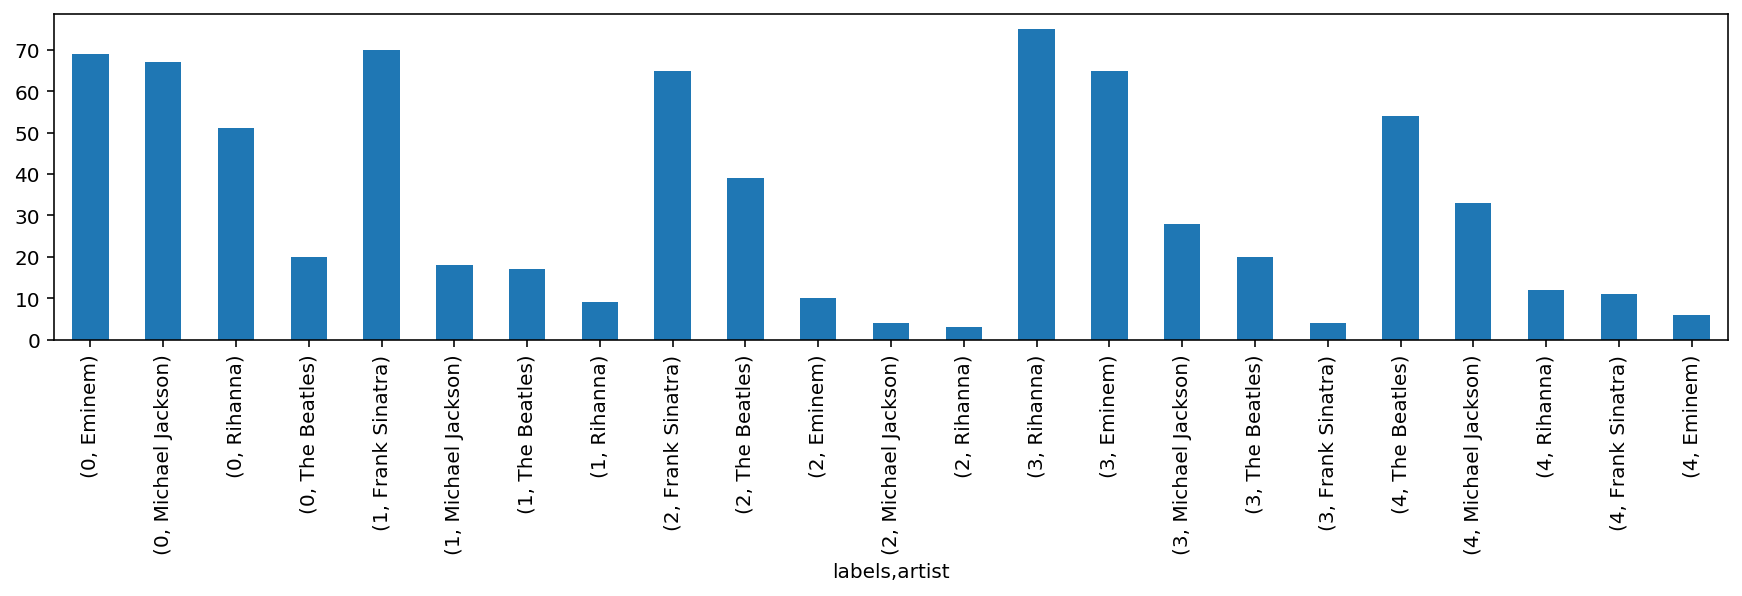

In [111]:
final_df.groupby('labels')['artist'].value_counts().plot.bar()

In [112]:
final_df['artist'].value_counts()

Michael Jackson    150
Eminem             150
Rihanna            150
Frank Sinatra      150
The Beatles        150
Name: artist, dtype: int64

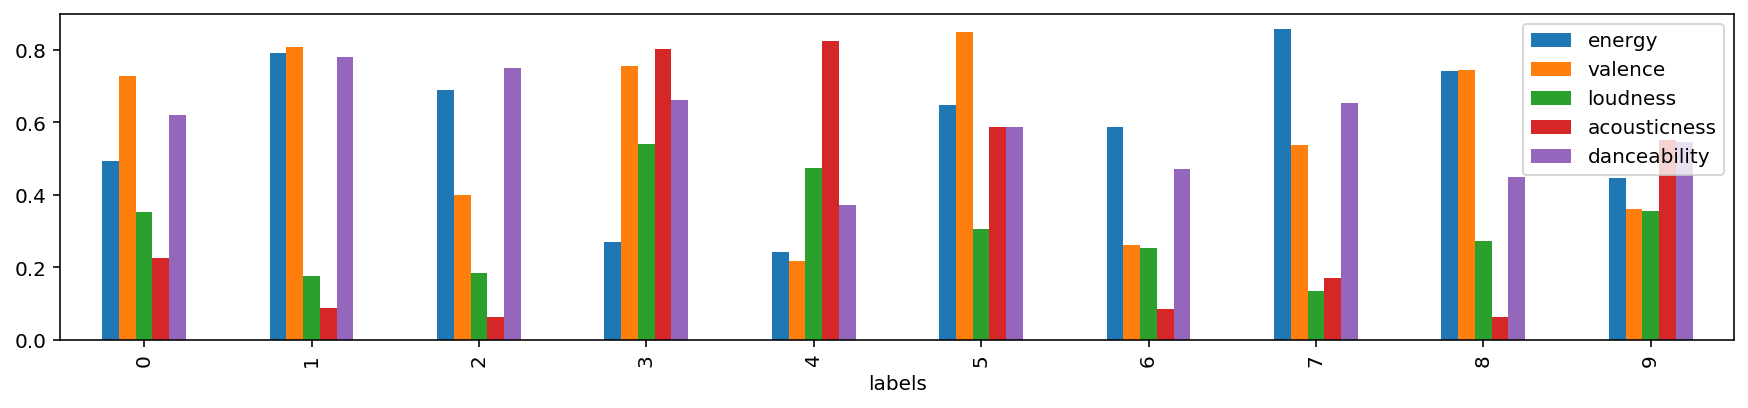

In [82]:
final_df.groupby('labels')[musical_features].mean().plot.bar()

In [58]:
import texthero as hero
final_df['lyrics_clean'] = hero.clean(final_df['lyrics'])

final_df.groupby('labels')['lyrics_clean'].apply(lambda g: hero.top_words(g)[:10])

labels       
0       like     1091
        get       906
        yeah      877
        oh        854
        love      803
        know      788
        got       770
        baby      664
        cause     660
        go        609
1       love      257
        know      150
        oh        124
        never     116
        let       115
        like      113
        get        99
        go         98
        night      95
        day        95
2       love      632
        yeah      386
        know      315
        like      303
        let       303
        one       250
        get       247
        baby      244
        oh        227
        got       226
3       love      279
        know      208
        one       202
        never     140
        day       139
        like      128
        time      127
        heart     127
        let       122
        night     121
4       like     1013
        yeah      814
        get       717
        know      709
        love      

In [59]:
final_df.groupby('name_album')['labels'].apply(lambda g: len(g.unique()))

name_album
1 (Remastered)                       5
A Girl Like Me                       5
ANTI (Deluxe)                        5
Abbey Road (Remastered)              5
Abbey Road (Super Deluxe Edition)    5
                                    ..
Vegas (Live)                         3
World On A String (Live)             4
XSCAPE                               3
Yellow Submarine (Remastered)        4
Yellow Submarine Songtrack           4
Name: labels, Length: 75, dtype: int64

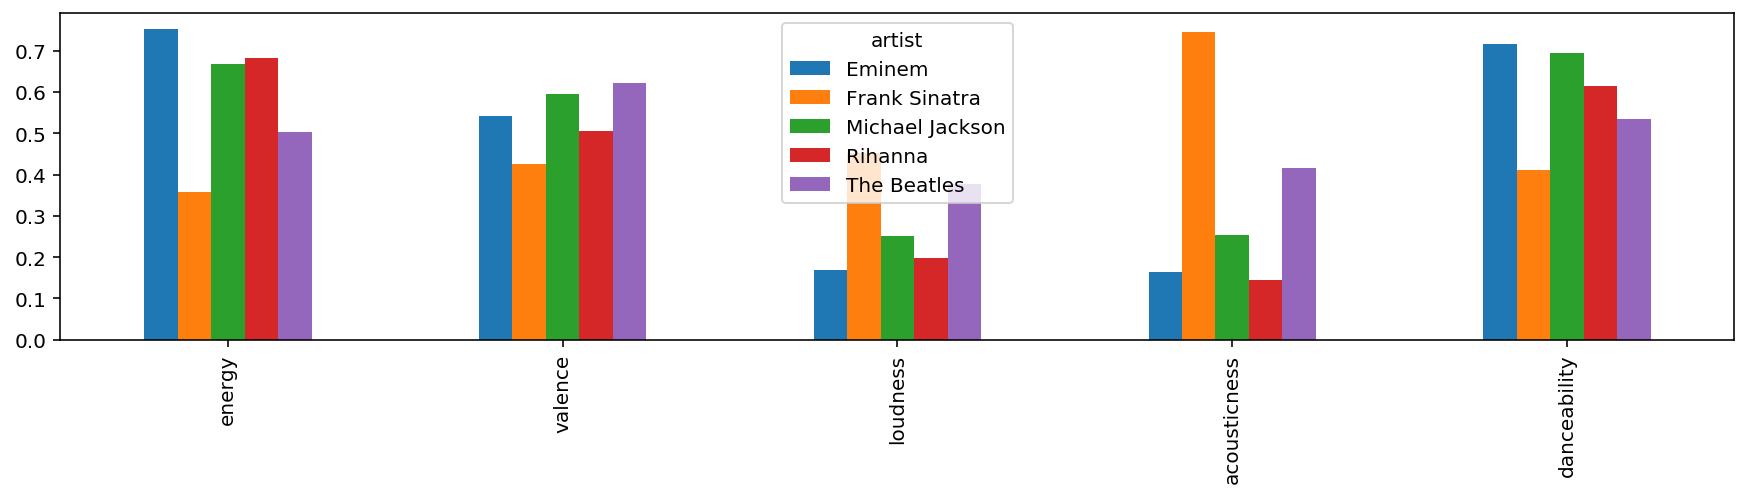

In [91]:
x = final_df.groupby('artist')[musical_features].mean().T.plot.bar()

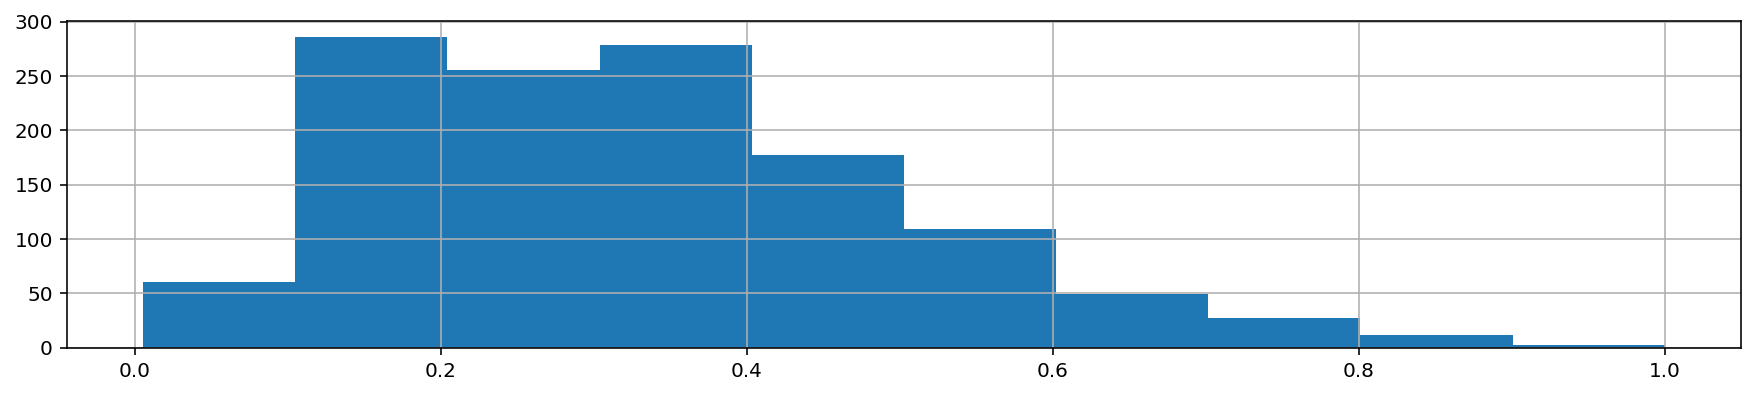

In [67]:
final_df['loudness'].hist()